In [1]:
 #importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import datetime as dt
import operator
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

In [2]:
 #Reading data from csv and print first 5 rows
df1 = pd.read_csv("../Python/Dataset/Other/Request_Log")
df1.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730


In [3]:
 #Dataframe information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22025 entries, 0 to 22024
Data columns (total 7 columns):
_ID          22025 non-null int64
 TimeSt      22025 non-null object
Country      22025 non-null object
Province     22025 non-null object
City         22025 non-null object
Latitude     22025 non-null float64
Longitude    22025 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ MB


<function seaborn.utils.despine>

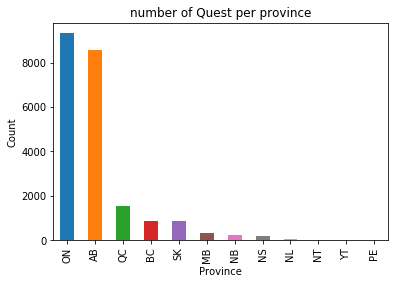

In [4]:
# Taking a count of the request logs per province
df1['Province'].value_counts().plot(kind='bar')
plt.title('number of Quest per province')
plt.xlabel('Province')
plt.ylabel('Count')
sns.despine

In [5]:
 #Taking a count of the top number of request logs per city

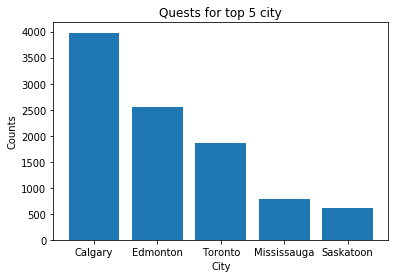

In [6]:

unique, counts = np.unique(df1[['City']].values, return_counts=True)
unique = np.reshape(unique, (656,1))
counts = np.reshape(counts, (656,1))
dataset = pd.DataFrame({'City':unique[:,0],'Counts':counts[:,0]})
result = dataset.sort_values('Counts', ascending = False)
#print(result)
result.head()
x = [1, 2, 3, 4, 5]
y = result.iloc[0:5]['Counts']
LABELS = [result.iloc[0]['City'], result.iloc[1]['City'], result.iloc[2]['City'], result.iloc[3]['City'], result.iloc[4]['City']]

plt.bar(x, y, align='center')
plt.xticks(x, LABELS)
plt.xlabel("City")
plt.ylabel("Counts")
plt.title("Quests for top 5 city")

In [7]:
 #Top five cities of request logs
result.head()

,City,Counts
80,Calgary,3979
164,Edmonton,2549
577,Toronto,1859
330,Mississauga,777
500,Saskatoon,616


In [8]:
 #Unique cities and count of request logs of each city
unique, count = np.unique(df1[['City']].values, return_counts=True)
len(unique)

656

In [9]:
unique

array(['108 Mile Ranch', 'Abbotsford', 'Aberdeen', 'Acme', 'Acton',
       'Airdrie', 'Ajax', 'Alberta Beach', 'Aldergrove', 'Alix',
       'Alliston', 'Alma', 'Almonte', 'Amos', 'Ancaster', 'Angus',
       'Anjou', 'Anmore', 'Antigonish', 'Ardrossan', 'Armdale',
       'Armstrong', 'Arnprior', 'Artemesia', 'Asquith', 'Assiniboia',
       'Atikokan', 'Atwood', 'Aulac', 'Aurora', 'Aylmer', 'Banff',
       'Barrhead', 'Barrie', 'Bashaw', 'Bay Roberts', 'Beaudry',
       'Beauharnois', 'Beaumont', 'Beauport', 'Beausejour', 'Beechville',
       'Belleisle Creek', 'Belleville', 'Beloeil', 'Bewdley',
       'Big Valley', 'Birsay', 'Bishopton', 'Blackfalds', 'Blainville',
       'Boisbriand', 'Bolton', 'Bonanza', 'Bonaventure', 'Bonavista',
       'Bonnyville', 'Botha', 'Boucherville', 'Boutiliers Point',
       'Bowmanville', 'Bracebridge', 'Bradford',
       'Bradford West Gwillimbury', 'Brampton', 'Brandon', 'Brantford',
       'Bridesville', 'Brockville', 'Brome', 'Brooks', 'Brossard',
  

In [10]:
 #Removing fake request logs

In [11]:
df3 = pd.DataFrame(columns=['_ID',' TimeSt','Country','Province','City','Latitude','Longitude'])

for i in range(len(unique)):
    fruits = unique[i]
    x=fruits
    df2 = df1.loc[df1['City'] ==str(x)]
    df2[' TimeSt'] = pd.to_datetime(df2[' TimeSt'])
    df2[' TimeSt'] = df2[' TimeSt'].values.astype('<M8[m]')
    df2 = df2.sort_values(by='_ID').drop_duplicates(' TimeSt')
    df2[' TimeSt'] = df2[' TimeSt'].dt.strftime('%Y %B %d %H %M')

    if x == '108 Mile Ranch':
        df3=df2
    else:
        df3=df3.append(df2)
df3.head()

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,_ID,TimeSt,Country,Province,City,Latitude,Longitude
2122,4622917,2017 June 21 14 05,CA,BC,108 Mile Ranch,51.73946,-121.33774
4662,4750034,2017 June 21 02 15,CA,BC,108 Mile Ranch,51.73951,-121.33796
6114,4822399,2017 June 21 07 20,CA,BC,108 Mile Ranch,51.73948,-121.33789
3699,4700905,2017 June 21 13 11,CA,BC,Abbotsford,49.05022,-122.32839
4470,4740530,2017 June 21 12 14,CA,BC,Abbotsford,49.06945,-122.30482


<function seaborn.utils.despine>

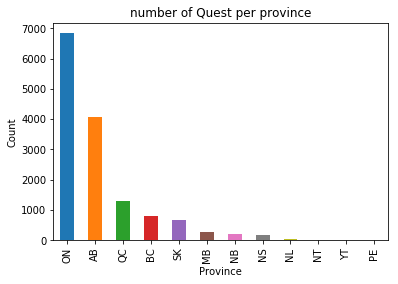

In [12]:
# Taking a count of the request logs per province after removing fake request
b = df3['Province'].value_counts()
plot2 = b.plot(kind='bar')
plt.title('number of Quest per province')
plt.xlabel('Province')
plt.ylabel('Count')
sns.despine

In [13]:
#City wise fake request drop

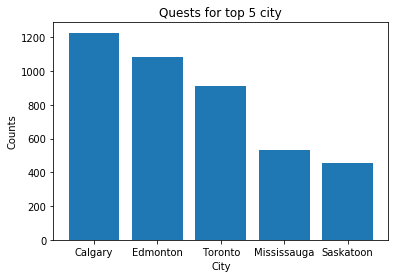

In [14]:
unique, counts = np.unique(df3[['City']].values, return_counts=True)
unique = np.reshape(unique, (656,1))
counts = np.reshape(counts, (656,1))
dataset = pd.DataFrame({'City':unique[:,0],'Counts':counts[:,0]})
result = dataset.sort_values('Counts', ascending = False)
#print(result)
result.head()
x = [1, 2, 3, 4, 5]
y = result.iloc[0:5]['Counts']
LABELS = [result.iloc[0]['City'], result.iloc[1]['City'], result.iloc[2]['City'], result.iloc[3]['City'], result.iloc[4]['City']]

plt.bar(x, y, align='center')
plt.xticks(x, LABELS)
plt.xlabel("City")
plt.ylabel("Counts")
plt.title("Quests for top 5 city")

In [15]:
 #Top five cities of request logs
result.head()

,City,Counts
80,Calgary,1227
164,Edmonton,1084
577,Toronto,914
330,Mississauga,531
500,Saskatoon,458


In [16]:
 #Generate POI list

In [17]:
df4 = pd.DataFrame({'POIID':['PO1', 'PO2', 'PO3', 'PO4'], 'Latitude':['53.546167', '53.546167', '45.521629', '45.224830'], 'Longitude':['-113.485734', '-113.485734', '-73.566024', '-63.232729'] })
df4.head()

,Latitude,Longitude,POIID
0,53.546167,-113.485734,PO1
1,53.546167,-113.485734,PO2
2,45.521629,-73.566024,PO3
3,45.224830,-63.232729,PO4


In [18]:
 #Calculate the distance between various POI and requests
dist=[]
R = 6373.0  #approx. radius of earth
for i,j in zip(range(len(df4['Latitude'])), range(len(df4['Longitude']))):
    for k,l in zip(range(len(df1['Latitude'])), range(len(df1['Longitude']))):
        lat1 = radians(float(df4['Latitude'][i]))
        lat2 = radians(float(df1['Latitude'][k]))
        lon1 = radians(float(df4['Longitude'][j]))
        lon2 = radians(float(df1['Longitude'][l]))
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        dist.append(R * c)


In [19]:
 #Convert the list into table
    
df5 = pd.DataFrame(np.array(dist).reshape((22025,4), order='F'), columns = ['PO1','PO2','PO3', 'PO4'])
df5.head()

,PO1,PO2,PO3,PO4
0,2644.582501,2644.582501,593.599727,1383.224452
1,2631.542051,2631.542051,677.522278,1460.293945
2,2656.587930,2656.587930,569.826563,1359.759836
3,2621.269782,2621.269782,634.933253,1424.612908
4,2621.269782,2621.269782,634.933253,1424.612908


In [20]:
 #Generate the original array with an extra column for POIID
lab=df5.idxmin(axis=1)
df1["POIID"] = lab
df1.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,POIID
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,PO3
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,PO3
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,PO3
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,PO3
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,PO3


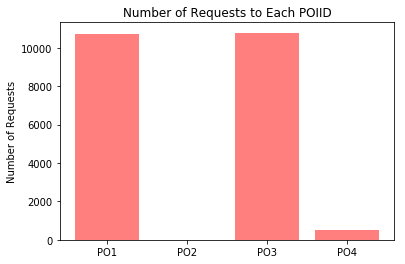

In [21]:
#plot of the distance variation (POI and PO2 are same loc hence equal distance)

P1=len(df1.loc[df1['POIID'] == 'PO1'])
P2=len(df1.loc[df1['POIID'] == 'PO2'])
P3=len(df1.loc[df1['POIID'] == 'PO3'])
P4=len(df1.loc[df1['POIID'] == 'PO4'])

objects = ('PO1', 'PO2', 'PO3', 'PO4')
y_pos = np.arange(len(objects))
performance = [P1,P2,P3,P4]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='r')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Requests')
plt.title('Number of Requests to Each POIID')

In [22]:
 #Calculate average and standard deviation of each location to its POI station

In [23]:
l1=[]
l2=[]
l3=[]
l4=[]
dist1 = df5.min(axis=1)
for i in range(22025):
    if lab[i] == 'PO1':
        l1.append(dist1[i])
    elif lab[i] == 'PO2':
        l2.append(dist1[i])
    elif lab[i] == 'PO3':
        l3.append(dist1[i])
    else:
        l4.append(dist1[i])

/home/jobin/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jobin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jobin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jobin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jobin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


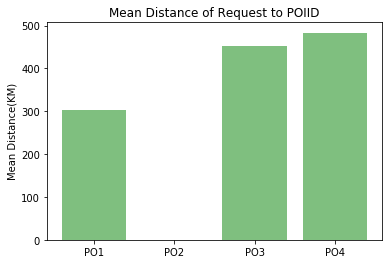

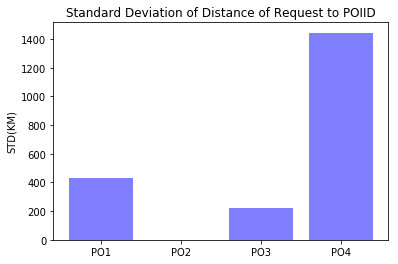

In [24]:
mP1=np.mean(np.array(l1))
mP2=np.mean(np.array(l2))
mP3=np.mean(np.array(l3))
mP4=np.mean(np.array(l4))

sP1=np.std(np.array(l1))
sP2=np.std(np.array(l2))
sP3=np.std(np.array(l3))
sP4=np.std(np.array(l4))

objects = ('PO1', 'PO2', 'PO3', 'PO4')
y_pos = np.arange(len(objects))
performance = [mP1,mP2,mP3,mP4]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('Mean Distance(KM)')
plt.title('Mean Distance of Request to POIID')

plt.figure()
objects = ('PO1', 'PO2', 'PO3', 'PO4')
y_pos = np.arange(len(objects))
performance = [sP1,sP2,sP3,sP4]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('STD(KM)')
plt.title('Standard Deviation of Distance of Request to POIID')

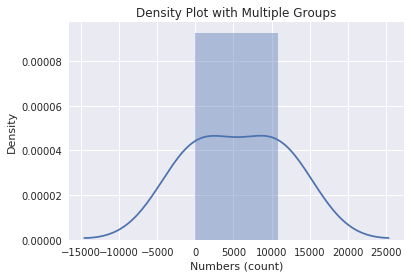

In [47]:
#Density of different Groups
x = [P1,P2,P3,P4]
ax = sns.distplot(x)
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Groups')
plt.xlabel('Numbers (count)')
plt.ylabel('Density')